In [22]:
import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [87]:
# Read in the document-term matrix

data_cv = pd.read_pickle('dtm_cv.pickle')
data_cv = data_cv.transpose()
data_cv['index'] = data_cv.index
# data_cv.transpose()
data_cv

,wsb,science,ama,askreddit,worldnews,funny,dankmemes,memes,nosleep,psychology,politics,cscareerquestions,writingprompts,index
aa,0,10,0,9,2,0,0,0,1,2,2,0,0,aa
aaa,5,0,0,3,0,0,0,0,0,0,2,0,0,aaa
aaaaa,0,0,0,0,0,0,0,1,0,0,0,0,0,aaaaa
aaaaaaaa,0,0,0,1,0,0,0,0,0,0,0,0,0,aaaaaaaa
aaaaaaaaaaaa,0,0,0,1,1,0,0,0,0,0,0,0,0,aaaaaaaaaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝙄𝙏,0,0,0,1,0,0,0,0,0,0,0,0,0,𝙄𝙏
𝙏𝙃𝙀,0,0,0,2,0,0,0,0,0,0,0,0,0,𝙏𝙃𝙀
𝙔𝙀𝙎,0,0,0,1,0,0,0,0,0,0,0,0,0,𝙔𝙀𝙎
𝚃𝚑𝚒𝚜,0,0,0,0,0,0,0,1,0,0,0,0,0,𝚃𝚑𝚒𝚜


In [97]:
for i, row in enumerate(data_cv['index']):
    candidate = re.match('a{2,}', str(row))
    if candidate != None:
        data_cv.drop(row, inplace=True)
    if row == 'ababababba':
        data_cv.drop(row, inplace=True)
    if row == 'wa':
        data_cv.drop(row, inplace=True)       
    if row == 'ha':
        data_cv.drop(row, inplace=True)    
data_cv

,wsb,science,ama,askreddit,worldnews,funny,dankmemes,memes,nosleep,psychology,politics,cscareerquestions,writingprompts,index
ab,3,29,0,7,0,0,0,0,2,0,3,2,8,ab
aba,0,2,0,2,0,0,0,0,0,0,0,0,0,aba
abacavir,0,1,0,0,0,0,0,0,0,0,0,0,0,abacavir
aback,0,4,0,2,1,0,0,0,0,0,1,1,3,aback
abagails,0,0,0,0,0,0,0,0,1,0,0,0,0,abagails
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝙄𝙏,0,0,0,1,0,0,0,0,0,0,0,0,0,𝙄𝙏
𝙏𝙃𝙀,0,0,0,2,0,0,0,0,0,0,0,0,0,𝙏𝙃𝙀
𝙔𝙀𝙎,0,0,0,1,0,0,0,0,0,0,0,0,0,𝙔𝙀𝙎
𝚃𝚑𝚒𝚜,0,0,0,0,0,0,0,1,0,0,0,0,0,𝚃𝚑𝚒𝚜


ValueError: num must be 1 <= num <= 12, not 13

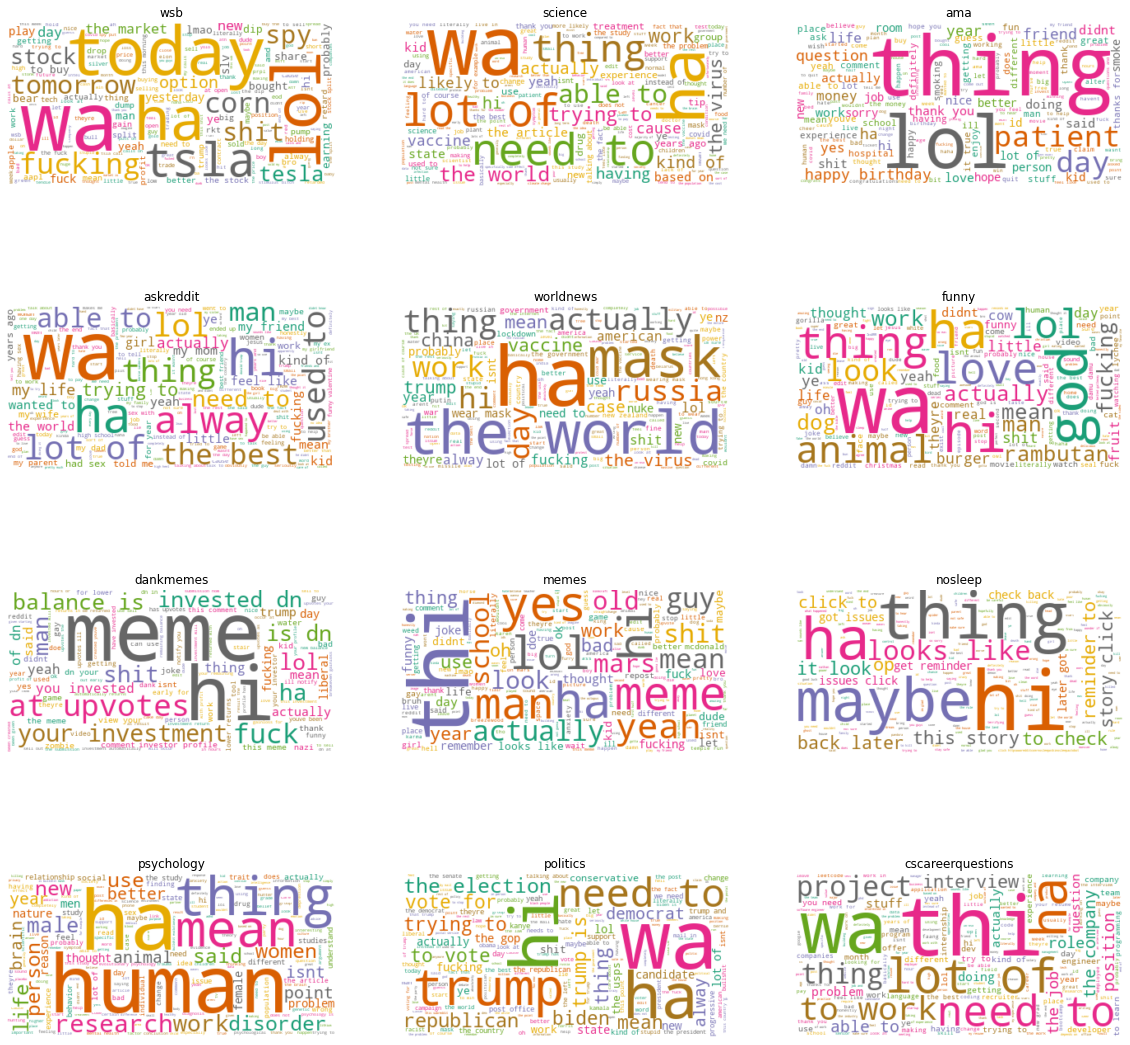

In [100]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]

for index, subreddit in enumerate(data_cv.columns):
    wc.generate(data_clean.text[subreddit])
    plt.subplot(4, 3, index + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(subreddit)

plt.show()

In [102]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_cv)
corpus = matutils.Sparse2Corpus(sparse_counts)

TypeError: no supported conversion for types: (dtype('O'),)

In [58]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pickle", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
id2word

{36625: 'future',
 4480: 'apple',
 88219: 'share',
 39193: 'gran',
 52974: 'kids',
 5381: 'ask',
 24704: 'didnt',
 12769: 'buy',
 110819: 'youll',
 3670: 'answer',
 10941: 'bought',
 19541: 'corn',
 49440: 'instead',
 93270: 'stare',
 590: 'account',
 109645: 'wow',
 69066: 'options',
 84988: 'safe',
 37008: 'gang',
 82062: 'responded',
 29189: 'email',
 97932: 'thanks',
 82275: 'retard',
 91140: 'social',
 49660: 'interaction',
 94705: 'sub',
 100893: 'trending',
 99009: 'tickers',
 87572: 'sentiments',
 84773: 'rwallstreetbets',
 22339: 'day',
 6120: 'august',
 99008: 'tickercompanymentionsbulls',
 8080: 'bearspricechangepe',
 101487: 'tslatesla',
 92765: 'spyexchange',
 100349: 'traded',
 90572: 'slvexchange',
 69: 'aaplapple',
 19572: 'cornexchange',
 83326: 'rktrocket',
 17889: 'companies',
 63308: 'msftmicrosoft',
 2911: 'amdadvanced',
 60730: 'micro',
 7810: 'bathe',
 10361: 'boeing',
 32982: 'fbfacebook',
 77298: 'prplpurple',
 49201: 'innovation',
 78163: 'qqqexchange',
 65065

In [59]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

INFO - 17:21:13: using symmetric alpha at 0.5
INFO - 17:21:13: using symmetric eta at 0.5
INFO - 17:21:13: using serial LDA version on this node
INFO - 17:21:13: running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 111923 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO - 17:21:13: PROGRESS: pass 0, at document #2000/111923
INFO - 17:21:13: merging changes from 2000 documents into a model of 111923 documents
INFO - 17:21:13: topic #0 (0.500): 0.373*"aaaaaaaa" + 0.178*"aaa" + 0.107*"aaaaaaaaaaaaaaaall" + 0.101*"aaaaaaaaaaaaarrrrggg" + 0.061*"aaaaaaaaaaaa" + 0.046*"aaaaaaaaah" + 0.030*"aa" + 0.016*"aaaaaaaaaaaaaaaaaaaaaaaaaaaa" + 0.013*"aaaaaaaaaaaaaaaa" + 0.009*"aaaaaaaaaaaaaaaaaaaaaa"
INFO - 17:21:13: topic #1 (0.500): 0.320*"aaa" + 0.238*"aaaaaaaa" + 0.147*"aaaaaaaaaaaaaaaall" + 0.061*"aaaaaaaaaaaaarrrrggg" + 0.057*"aaaaaaaaah" + 0.055*"aa" 

KeyboardInterrupt: 